In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\apple_quality_2.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
df.shape

(4001, 9)

In [4]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [7]:
df['Acidity'].unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-2.229719806',
       '1.599796456', 'Created_by_Nidula_Elgiriyewithana'], dtype=object)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [10]:
df.dropna(axis=0 , inplace=True)

In [11]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [12]:
df.drop('A_id' , axis=1 , inplace=True)

In [13]:
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


C:\Users\User\AppData\Local\Temp\ipykernel_15544\1150832963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

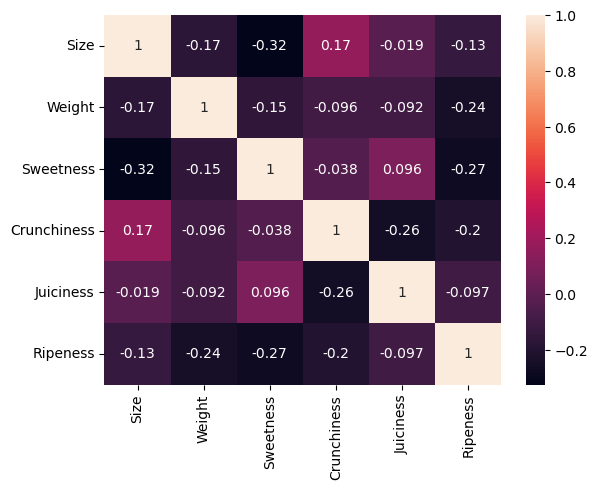

In [14]:
sns.heatmap(df.corr() , annot=True)

In [15]:
X = df.drop('Quality' , axis=1)
y = df['Quality']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=23)

In [16]:
#Hyperparameter Kernal == 'linear'

svc = SVC(kernel='linear')
svc.fit(X_train , y_train)

y_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test , y_pred))

0.73


In [17]:
#Hyperparameter Kernal == 'RBF'

rbf = SVC(kernel='rbf')
rbf.fit(X_train , y_train)

y_pred = rbf.predict(X_test)

print(metrics.accuracy_score(y_test , y_pred))


0.8925


In [18]:
#Hyperparameter Kernal == 'RBF'
#After gamma parameter

rbf = SVC(kernel='rbf' , gamma=0.25)
rbf.fit(X_train , y_train)

y_pred = rbf.predict(X_test)

print(metrics.accuracy_score(y_test , y_pred))

0.91875


In [19]:
#Hyperparameter Kernal == 'Sigmoid'

sig = SVC(kernel='poly')
sig.fit(X_train , y_train)

y_pred = sig.predict(X_test)

print(metrics.accuracy_score(y_test , y_pred))


0.85625


In [20]:
#Hyperparameter Kernal == 'Sigmoid'

sig = SVC(kernel='poly' , gamma=0.2)
sig.fit(X_train , y_train)

y_pred = sig.predict(X_test)

print(metrics.accuracy_score(y_test , y_pred))


0.87375
